<a href="https://colab.research.google.com/github/WitchMomorency/All-project-/blob/main/Tugas_Besar_Kecerdasan_Artifisial_Kelompok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar Kecerdasan Artifisial - Learning**
# Topik: Memprediksi Umur Kepiting menggunakan Metode Regresi
## Kelompok 2:
### - Baihaqi Bintang Bahana (1301223175)
### - Binta Adimastama (1301223005)
### - Putu Arjuna Nurgraha Eka Wana (1301223039)

## Pendahuluan dan Paparan Data
<h1>Pendahuluan</h1>
<p>
    Kepiting merupakan salah satu komoditas makanan laut yang digemari di berbagai negara di dunia. Permintaan yang tinggi terhadap kepiting menjadikannya sebagai peluang bisnis yang menjanjikan, terutama bagi masyarakat di wilayah pesisir. Bisnis budidaya kepiting memiliki sejumlah keunggulan, seperti biaya tenaga kerja yang rendah, biaya produksi yang relatif murah, serta tingkat pertumbuhan kepiting yang cepat. <br>
    Dengan pengelolaan dan perawatan yang baik, budidaya kepiting dapat memberikan keuntungan yang lebih besar dibandingkan budidaya udang. Sistem budidaya kepiting dapat dilakukan melalui dua metode utama, yaitu <i>grow-out farming</i> dan sistem penggemukan (<i>fattening system</i>). <br><br>
    Mengetahui usia kepiting yang tepat menjadi hal yang penting bagi petani komersial untuk menentukan waktu panen. Setelah mencapai usia tertentu, pertumbuhan fisik kepiting cenderung tidak signifikan, sehingga pengambilan keputusan waktu panen yang tepat dapat membantu menekan biaya dan meningkatkan keuntungan. Analisis data terkait usia dan karakteristik fisik kepiting menjadi salah satu langkah penting untuk mendukung hal tersebut.
</p>

<h1>Pemaparan Data</h1>
<p>
    Dataset yang digunakan dalam analisis ini bertujuan untuk memperkirakan usia kepiting berdasarkan atribut fisiknya. Dataset ini menyediakan landasan awal untuk melakukan analisis regresi klasik, rekayasa fitur (<i>feature engineering</i>), dan memahami dampak dari rekayasa fitur dalam domain data sains. Fokus utama dari dataset ini mencakup: <br><br>
    1. <b>Analisis Data Eksploratif</b><br>
    Memahami bagaimana berbagai karakteristik fisik kepiting berubah seiring dengan bertambahnya usia. <br><br>
    2. <b>Rekayasa Fitur</b><br>
    Mendefinisikan fitur baru dengan mengombinasikan data yang ada untuk meningkatkan akurasi model. <br><br>
    3. <b>Model Regresi</b><br>
    Membuat model regresi yang dapat memprediksi usia kepiting berdasarkan atribut fisiknya. <br><br>
    Dataset ini memberikan peluang besar untuk mendalami penerapan analisis regresi dan rekayasa fitur, terutama untuk meningkatkan efisiensi dan produktivitas dalam budidaya kepiting secara komersial.
</p>

# 1. Import Libraries

Mengimport modul-modul Python dari library yang dibutuhkan
- **Pandas**: Digunakan untuk manipulasi dan analisis data dengan bentuk Dataframe dan/atau Series
- **Numpy**: Menyediakan fungsionalitas operasi matematika serta array dan matriks
- **Matplotlib dan Seaborn**: Untuk membuat visualisasi dari data yang diberikan
- **OneHotEncoder**: Digunakan untuk encoding/mengubah data yang berbentuk categorical menjadi bentuk number
- **MinMaxScaler**: Digunakan untuk menormalisasi data dengan nilai minimum 0 dan maksimum 1
- **train_test_split**: Digunakan untuk membagi dataset menjadi dataset train dan test pada implementasi model
- **LinearRegression, DecisionTreeRegressor, dan RandomForestRegressor**: Digunakan untuk melakukan pemodelan regresi yang kemudian akan dibandingkan dari ketiga algoritma tersebut manakah yang paling baik
- **mean_absolute_error, mean_squared_error, r2_score**: Digunakan untuk mengukur dan mengevaluasi tingkat akurasi dari model regresi

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Data Loading and Description

Memuat dataset yang akan digunakan pada pemodelan regresi. Dataset disimpan pada Google Drive yang kemudian diunduh lalu dikonversi dari bentuk csv menjadi DataFrame Pandas

Dataset yang dimuat merupakan sekumpulan data dari sejumlah kepiting dengan karakteristik masing-masing yang bersumber dari Kaggle: https://www.kaggle.com/datasets/sidhus/crab-age-prediction. Dibawah ini terdapat sebagian dari dataset yang digunakan

In [ ]:
file_id = '12FzZ8OFcUmN9odUX57L62NW0gYrFEtWc'
download_url = f'https://drive.google.com/uc?id={file_id}' # Berbentuk link download Google Drive: https://drive.google.com/uc?id=12FzZ8OFcUmN9odUX57L62NW0gYrFEtWc

df = pd.read_csv(download_url)
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


Berikut merupakan informasi dari kolom-kolom fitur pada dataset, terdiri dari nama kolom, penjelasan, serta tipe data dari kolom tersebut:
- **Sex**: Jenis kelamin kepiting (M: Male/Jantan; F: Female/Betina; I: Indeterminate/Tidak Diketahui) [Categorical]
- **Length**: Panjang tubuh kepiting [Float]
- **Diameter**: Diameter tubuh kepiting [Float]
- **Height**: Tinggi kepiting [Float]
- **Weight**: Berat kotor kepiting [Float]
- **Shucked Weight**: Berat daging kepiting [Float]
- **Viscera Weight**: Berat organ dalam kepiting [Float]
- **Shell Weight**: Berat cangkang kepiting [Float]
- **Age**: Umur kepiting (Target) [Integer]

Dari informasi dataset dibawah juga kita dapat melihat jumlah data yang terdapat pada dataset tersebut yaitu sebanyak 3893 data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


Lalu berikut adalah deskripsi statistik dari dataset yang memuat jumlah kategori (unique), kategori paling dominan (top), dan jumlah kategori paling dominan (freq) untuk kolom bertipe data categorical, serta rata-rata (mean), standar deviasi (std), nilai minimum (min), quartil 25%, 50%, 75%, dan nilai maksimum (max) untuk kolom bertipe data number

In [ ]:
df.describe(include="all")

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,NaN,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,NaN,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,NaN,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,NaN,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,NaN,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000


Berikut adalah untuk menghitung data dengan field yang kosong pada dataset. Terlihat bahwa tidak ada data dengan field yang kosong pada kolom maupun baris manapun di dataset

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
Sex,0
Length,0
Diameter,0
Height,0
Weight,0
Shucked Weight,0
Viscera Weight,0
Shell Weight,0
Age,0


Berikut adalah untuk menghitung data duplikat pada dataset. Terlihat bahwa tidak ada data yang duplikat pada dataset

In [ ]:
duplicates = df.duplicated()

print("Duplicates:", duplicates.sum())

Duplicates: 0


# 3. Data Preprocessing

Berikut akan dilakukan One Hot Encoding untuk mengubah data categorical menjadi data numerical. One Hot Encoding berkerja dengan membuat sejumlah kolom baru sesuai dengan banyaknya kategori pada suatu data categorical dan mengubah suatu data categorical menjadi data numerical dengan nilai 1 pada kolom dengan kategori yang dimiliki dan nilai 0 pada kolom dengan kategori yang tidak dimiliki <br> (misal: data M akan diubah menjadi 1 pada Sex_M dan 0 pada Sex_F dan Sex_I)

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded = one_hot_encoder.fit_transform(df[categorical_columns])
df_one_hot = pd.DataFrame(encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df_one_hot,df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)

Berikut adalah hasil dari One Hot Encoding. Terlihat bahwa semua data sekarang telah berbentuk numerical yang akan memudahkan proses training pada model

In [ ]:
df_encoded.describe(include="all")

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.00000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,0.314667,0.316722,0.36861,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.464443,0.465258,0.48249,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.000000,0.000000,0.00000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,0.000000,0.000000,0.00000,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,0.000000,0.000000,0.00000,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.000000,1.000000,1.00000,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,1.000000,1.000000,1.00000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


Kemudian akan dilakukan eliminasi data outlier

<br> Berikut merupakan visualisasi boxplot dari dataset. Terlihat bahwa khususnya di Height terdapat outlier yang tersebar sangat jauh sekali dari persebaran data. Outlier tersebut akan mengganggu proses training model dan berpotensi mengakibatkan overfitting pada model

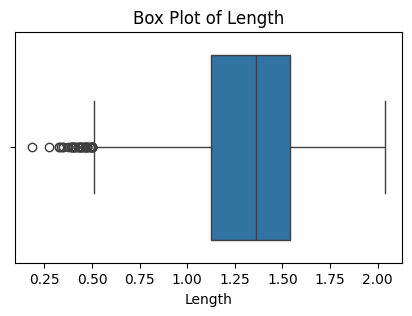

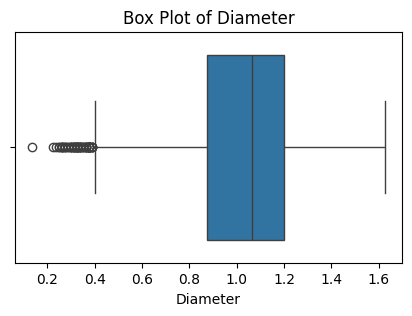

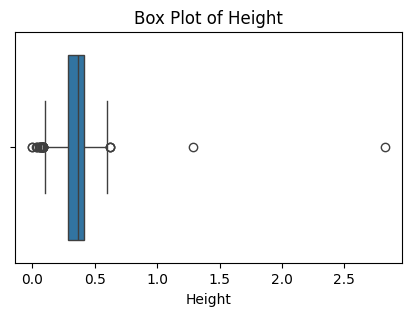

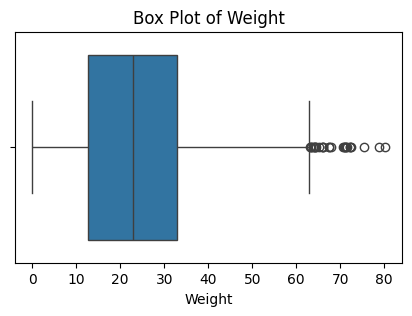

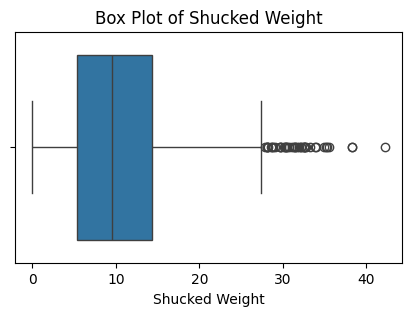

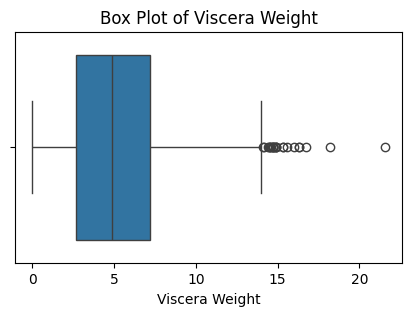

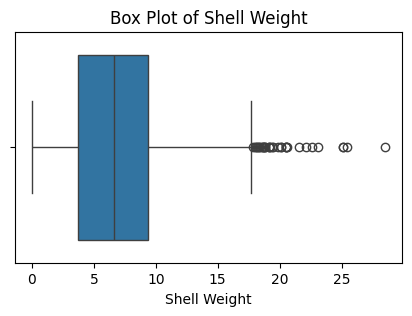

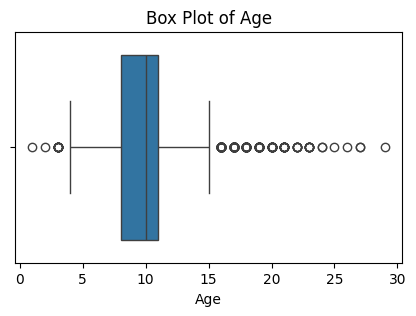

In [ ]:
df_num = df_encoded[df_encoded.drop(columns=['Sex_F', 'Sex_M', 'Sex_I']).columns]
for feature in df_num.columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df_num[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

Berikut adalah proses eliminasi data outlier. Data yang diluar lower dan upper bounds yang dirumuskan dibawah akan dieliminasi dari dataset. Terlihat juga perbedaannya setelah eliminasi outlier pada deskripsi statistik dataset

In [ ]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

upper_array = np.where(df_num >= upper)[0]
lower_array = np.where(df_num <= lower)[0]

df_no_outliers = df_encoded.drop(index=upper_array)
df_no_outliers = df_encoded.drop(index=lower_array)

df_no_outliers.describe(include="all")

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000
mean,0.319582,0.307833,0.372585,1.324869,1.031720,0.353352,23.924839,10.362519,5.213913,6.896712,10.048042
std,0.466376,0.461657,0.483556,0.282535,0.234449,0.100918,13.707982,6.202677,3.066343,3.890034,3.159186
min,0.000000,0.000000,0.000000,0.525000,0.400000,0.100000,1.318252,0.510291,0.226796,0.368544,4.000000
25%,0.000000,0.000000,0.000000,1.137500,0.875000,0.287500,13.044314,5.513978,2.778251,3.827183,8.000000
50%,0.000000,0.000000,0.000000,1.375000,1.062500,0.362500,23.048143,9.695529,4.904464,6.747181,10.000000
75%,1.000000,1.000000,1.000000,1.537500,1.212500,0.412500,33.037799,14.355478,7.257472,9.355335,11.000000
max,1.000000,1.000000,1.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


Berikut adalah visualisasi boxplot pada dataset. Terlihat bahwa outlier yang tersebar jauh tersebut telah tereliminasi

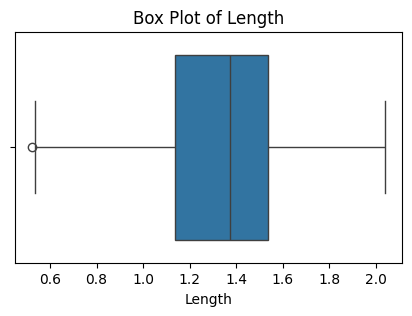

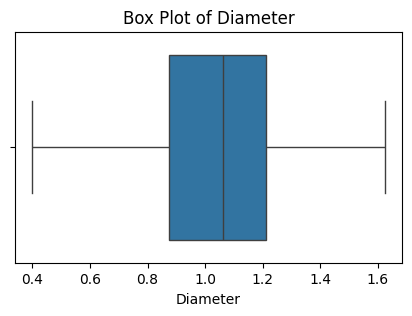

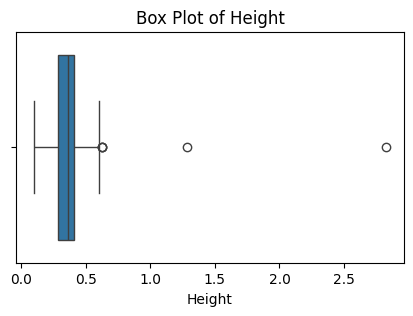

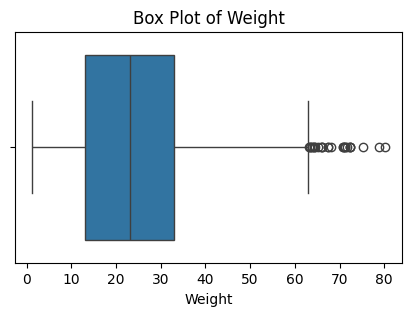

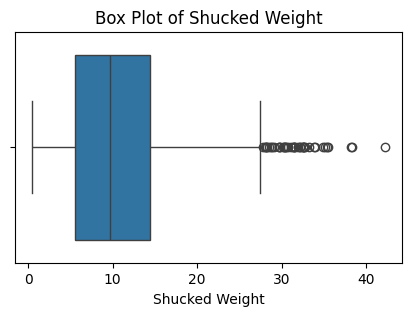

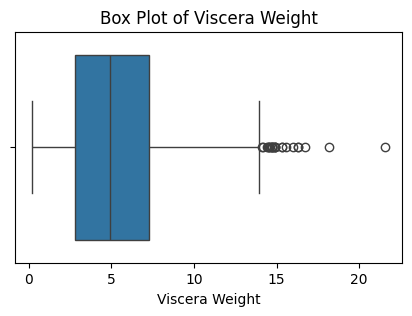

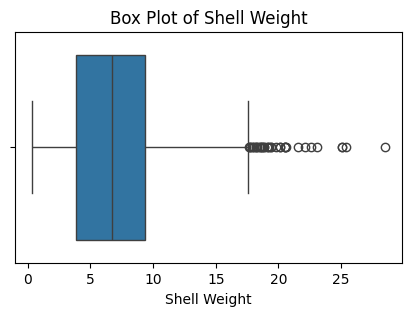

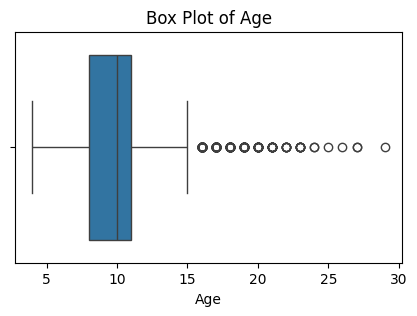

In [ ]:
df_num = df_no_outliers[df_no_outliers.drop(columns=['Sex_F', 'Sex_M', 'Sex_I']).columns]
for feature in df_num.columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df_num[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

Data yang didapatkan dari proses eliminasi outlier tersebut akan dinormalisasi agar prediksi dari model lebih akurat, mengurangi bias, dan mengurangi resiko overfitting

In [ ]:
numeric_features = df_no_outliers.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_no_outliers[numeric_features])
df_scaled = pd.DataFrame(df_scaled, columns=numeric_features)

Terlihat pada deskripsi statistik berikut nilai minimum adalah 0 dan nilai maksimum adalah 1 untuk setiap kolom. Hal ini membuktikan bahwa data telah dinormalisasi secara baik

In [ ]:
df_scaled.describe(include="all")

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000,3830.000000
mean,0.319582,0.307833,0.372585,0.528839,0.515690,0.092973,0.286947,0.236413,0.233930,0.232132,0.241922
std,0.466376,0.461657,0.483556,0.186800,0.191387,0.037034,0.173996,0.148839,0.143833,0.138324,0.126367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.404959,0.387755,0.068807,0.148840,0.120068,0.119681,0.122984,0.160000
50%,0.000000,0.000000,0.000000,0.561983,0.540816,0.096330,0.275819,0.220408,0.219415,0.226815,0.240000
75%,1.000000,1.000000,1.000000,0.669421,0.663265,0.114679,0.402618,0.332228,0.329787,0.319556,0.280000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4. Exploratory Data Analysis (EDA)

Akan dilakukan visualisasi data dari dataset yang telah di-preprocessing sebelumnya. <br>

Dibawah ini adalah diagram yang berisikan barplot pada seluruh kolom yang terdapat pada dataset

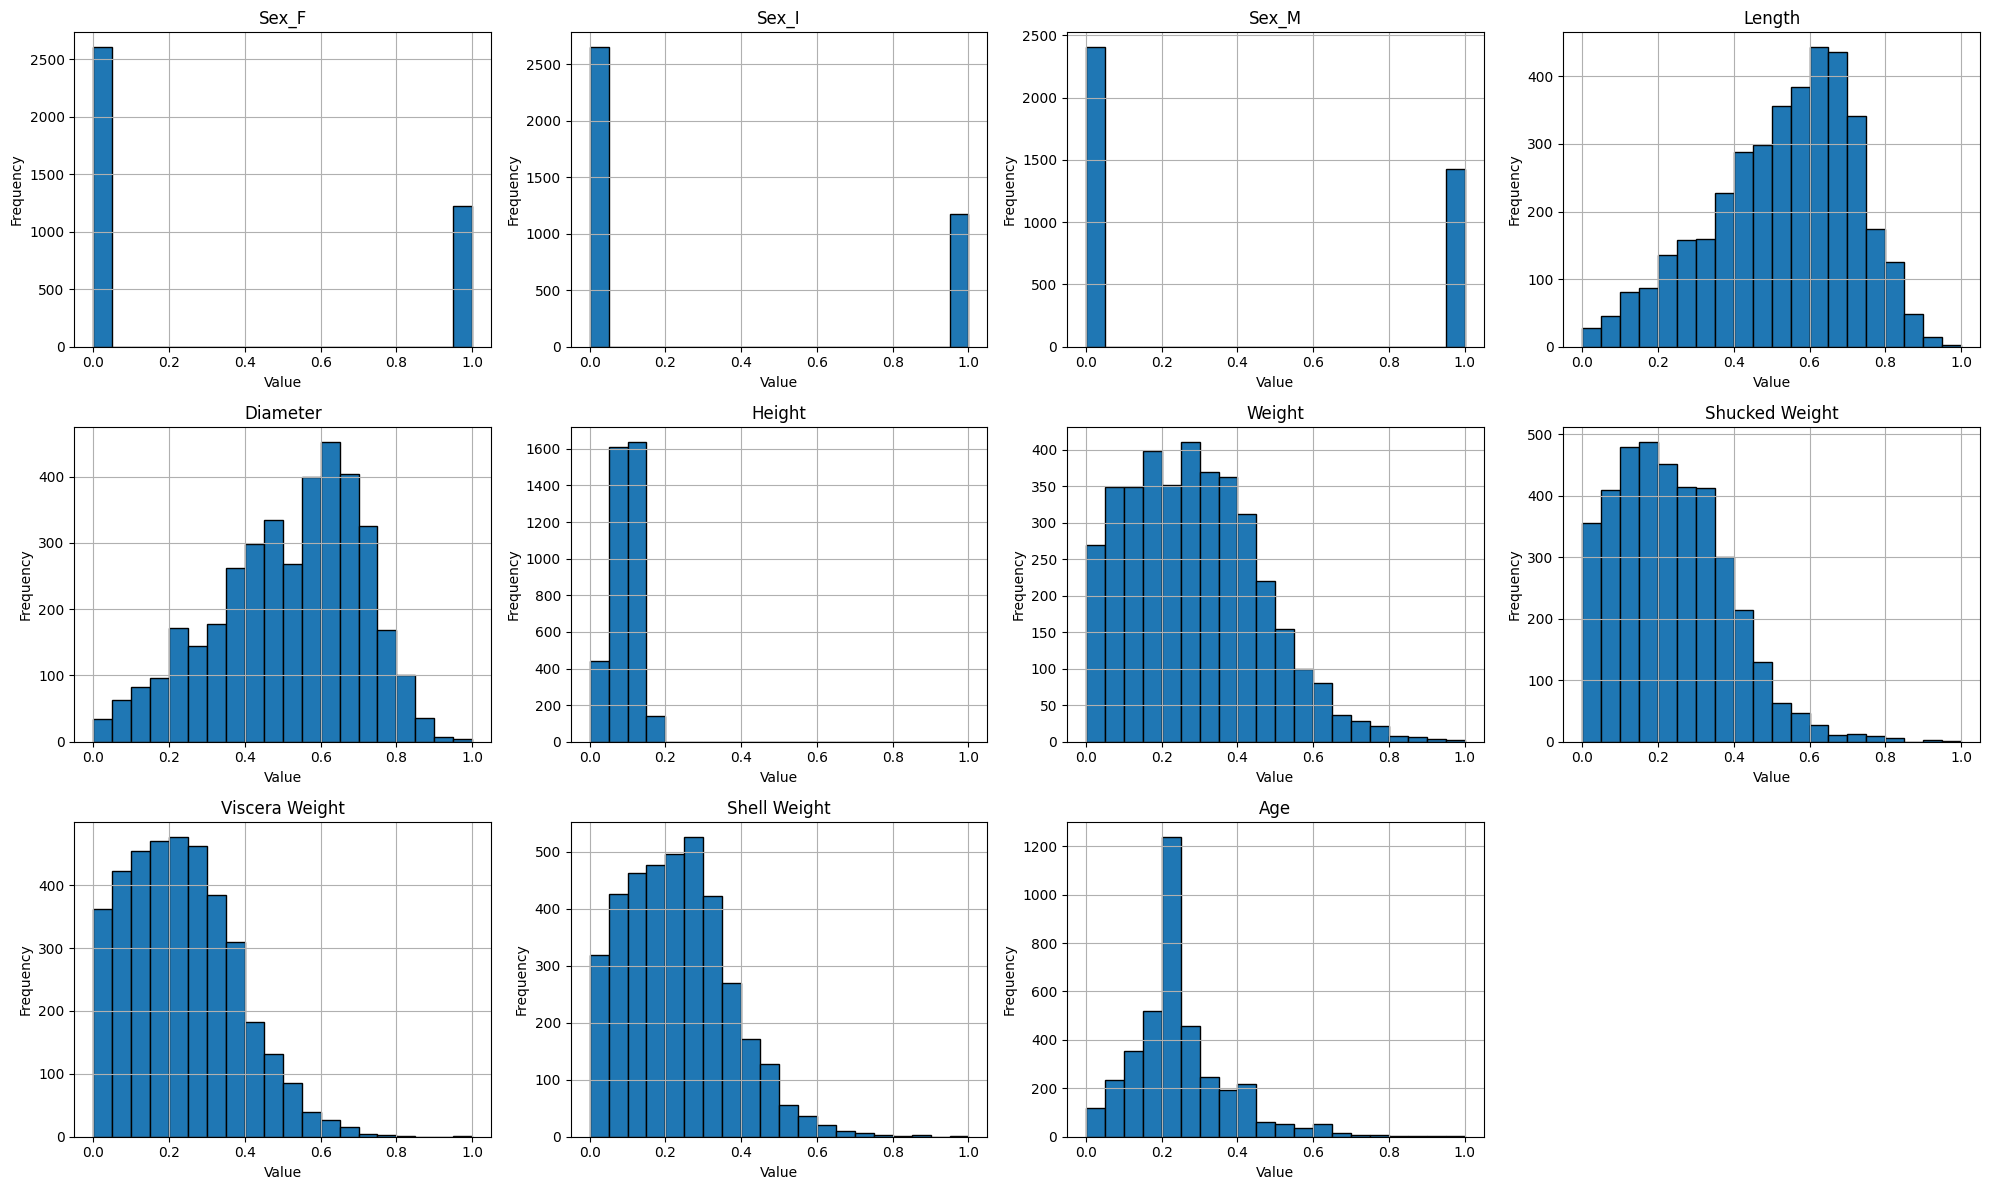

In [ ]:
num_vars = df_scaled.shape[1]

n_cols = 4
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(df_scaled.columns):
    df_scaled[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Dibawah ini merupakan heatmap yang menunjukkan korelasi dari setiap kolom fitur pada dataset. Semakin merah kotak pada heatmap tersebut maka semakin kuat korelasi diantara kedua kolom fitur yang berkaitan. Sebaliknya, semakin putih kotak opada heatmap tersebut maka semakin lemah korelasi kedua kolom fitur tersebut. Lalu juga semakin biru kotak pada heatmap tersebut, maka semakin bertolak belakang korelasi pada kedua fitur yang berkaitan

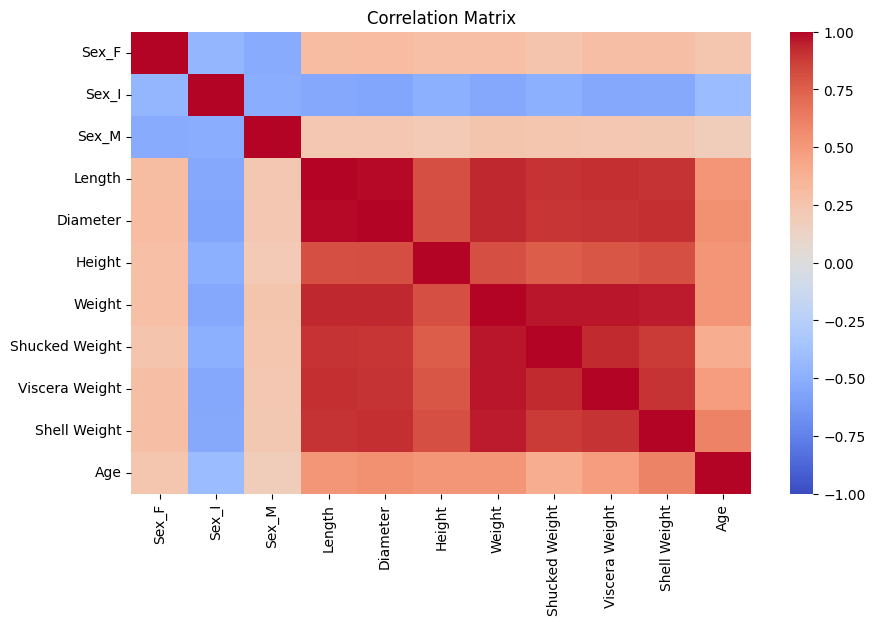

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df_scaled.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Lalu berikut adalah korelasi tiap kolom fitur terhadap Age, menunjukkan seberapa kuat atau lemahnya korelasi tiap kolom fitur terhadap Age yang merupakan target pada model ini

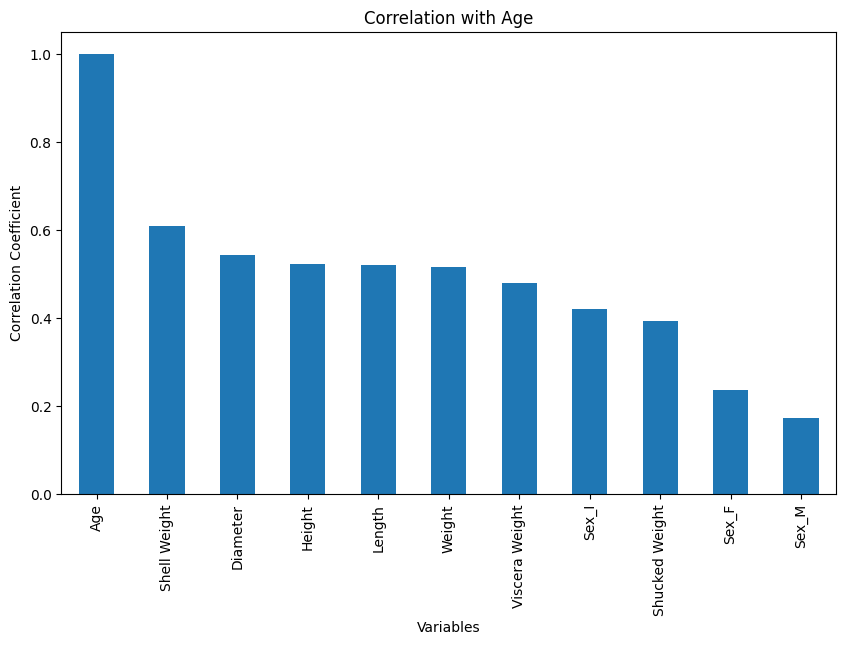

In [ ]:
target_corr = df_scaled.corr()['Age']

target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with Age')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

# 5. Data Splitting

Berikut akan dilakukan data splitting untuk memisahkan data training dari data test pada dataset tersebut untuk mendeteksi apabila terjadinya overfitting jika model akan dideploy. Data dibagi dengan rasio 80:20 dengan 80% dari dataset merupakan data training dan 20% dari dataset merupakan data testing. Disini data target juga dipisah dari data fitur

In [ ]:
X = df_scaled.drop(columns=['Age'])
y = df_scaled['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Data in dataset: ",len(X))
print("Training data: ",len(X_train))
print("Testing data: ",len(X_test))

Data in dataset:  3830
Training data:  3064
Testing data:  766


# 6. Model Implementation

### Metode:
Pada implementasi model ini, metode yang akan digunakan adalah dengan supervised learning tepatnya dengan metode regression. Digunakan metode regression karena target merupakan data dengan tipe data numerik. Lalu kami juga membandingkan tiga algoritma regression berbeda untuk memilih mana algoritma yang terbaik dari ketiga algoritma tersebut. Tiga algoritma yang digunakan antara lain: **Linear Regression** yang menerapkan fungsi linear untuk melakukan estimasi, **Decision Tree Regressor** yang menerapkan konsep Decision Tree untuk melakukan pekerjaan Regression, serta **Random Forest Regressor** yang merupakan sekumpulan Decision Tree.


### Pengukuran Kinerja:
Matriks evaluasi yang digunakan untuk mengukur kinerja algoritma adalah dengan mengukur MAE (Mean Absolute Error), MSE (Mean Squared Error), serta R2 Score dari setiap algoritma yang digunakan. Evaluasi dilakukan baik pada model training maupun pada testing, untuk mendeteksi overfitting pada model

### Setting Parameter:
Parameter yang digunakan pada eksperimen ini adalah max_depth = 5 (kedalaman maksimal tree) pada Decision Tree Regressor dan Random Forest Regressor, n_estimators=50 (jumlah estimator) pada Random Forest Regressor, serta random_state = 45 pada Decision Tree Regressor dan Random Forest Regressor

## Linear Regression

### Model Fitting/Training

Disini model akan dilatih menggunakan algoritma Linear Regression

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

### Model Testing

Model akan memprediksi output berdasarkan input yang diberikan.

In [ ]:
pred_train_LR = LR.predict(X_train)
pred_LR = LR.predict(X_test)

### Model Evaluation

Hasil prediksi model kemudian dievaluasi menggunakan MAE, MSE, dan R2 score berdasarkan target yang dimiliki sebelumnya

In [ ]:
mae_train_LR = mean_absolute_error(y_train, pred_train_LR)
mse_train_LR = mean_squared_error(y_train, pred_train_LR)
r2_train_LR = r2_score(y_train, pred_train_LR)

mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

data = {
    'MAE': [mae_train_LR],
    'MSE': [mse_train_LR],
    'R2': [r2_train_LR]
}

df_results = pd.DataFrame(data, index=['LR Train'])
df_results.loc['LR Train'] = [mae_train_LR, mse_train_LR, r2_train_LR]
df_results.loc['LR Test'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
LR Train,0.063376,0.007661,0.512677
LR Test,0.063923,0.008148,0.518915


## Decision Tree Regressor

### Model Fitting/Training

Disini model akan dilatih menggunakan algoritma Decision Tree Regressor

In [ ]:
DTR = DecisionTreeRegressor(max_depth=5, random_state=184)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=184)

### Model Prediction/Testing

Model akan memprediksi output berdasarkan input yang diberikan.

In [ ]:
pred_train_DTR = DTR.predict(X_train)
pred_DTR = DTR.predict(X_test)

### Model Evaluation

Hasil prediksi model kemudian dievaluasi menggunakan MAE, MSE, dan R2 score berdasarkan target yang dimiliki sebelumnya

In [ ]:
mae_train_DTR = mean_absolute_error(y_train, pred_train_DTR)
mse_train_DTR = mean_squared_error(y_train, pred_train_DTR)
r2_train_DTR = r2_score(y_train, pred_train_DTR)

mae_DTR = mean_absolute_error(y_test, pred_DTR)
mse_DTR = mean_squared_error(y_test, pred_DTR)
r2_DTR = r2_score(y_test, pred_DTR)

df_results.loc['DTR Train'] = [mae_train_DTR, mse_train_DTR, r2_train_DTR]
df_results.loc['DTR Test'] = [mae_DTR, mse_DTR, r2_DTR]
df_results

,MAE,MSE,R2
LR Train,0.063376,0.007661,0.512677
LR Test,0.063923,0.008148,0.518915
DTR Train,0.060422,0.007334,0.533513
DTR Test,0.067310,0.009447,0.442233


## Random Forest Regressor

Disini model akan dilatih menggunakan algoritma Random Forest Regressor

### Model Fitting/Training

In [ ]:
RFR = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=184)
RFR.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=184)

### Model Prediction/Testing

Model akan memprediksi output berdasarkan input yang diberikan.

In [ ]:
pred_train_RFR = RFR.predict(X_train)
pred_RFR = RFR.predict(X_test)

### Model Evaluation

Hasil prediksi model kemudian dievaluasi menggunakan MAE, MSE, dan R2 score berdasarkan target yang dimiliki sebelumnya

In [ ]:
mae_train_RFR = mean_absolute_error(y_train, pred_train_RFR)
mse_train_RFR = mean_squared_error(y_train, pred_train_RFR)
r2_train_RFR = r2_score(y_train, pred_train_RFR)

mae_RFR = mean_absolute_error(y_test, pred_RFR)
mse_RFR = mean_squared_error(y_test, pred_RFR)
r2_RFR = r2_score(y_test, pred_RFR)

df_results.loc['RFR Train'] = [mae_train_RFR, mse_train_RFR, r2_train_RFR]
df_results.loc['RFR Test'] = [mae_RFR, mse_RFR, r2_RFR]
df_results

,MAE,MSE,R2
LR Train,0.063376,0.007661,0.512677
LR Test,0.063923,0.008148,0.518915
DTR Train,0.060422,0.007334,0.533513
DTR Test,0.067310,0.009447,0.442233
RFR Train,0.058056,0.006639,0.577746
RFR Test,0.065359,0.008674,0.487823


## Kinerja dan Analisis Tahap Training
Model yang diberikan sudah dilatih dengan baik sehingga MAE dan MSE memiliki angka yang relatif kecil dan R2 yang cukup memadai. Namun pada tahap training, dari ketiga algoritma yang dibandingkan, algoritma Random Forest Tree merupakan algoritma terbaik terlihat dari MAE dan MSE paling kecil dan R2 paling besar diantara yang lain.

## Kinerja dan Analisis Tahap Testing
Model yang diberikan juga dapat melakukan prediksi dengan cukup baik terlihat dari matriks evaluasi MAE, MSE, dan R2 yang dimiliki ketiga algoritma. Namun pada tahap testing, dari ketiga algoritma yang dibandingkan, algoritma Linear Regression merupakan algoritma terbaik terlihat dari MAE dan MSE paling kecil dan R2 paling besar diantara yang lain

## Kesimpulan
Dari eksperimen yang dilakukan diatas, algoritma yang paling sesuai untuk digunakan pada model merupakan algoritma Linear Regression. Walaupun pada tahap testing Linear Regression memiliki performa yang relatif buruk dibanding algoritma lainnya, namun pada testing, algoritma ini memiliki performa terbaik.

Dari analisis diatas juga terlihat bahwa walaupun Random Forest Regression merupakan algoritma terbaik pada tahap training, namun pada tahap testing, algoritma ini mengalami penurunan performa yang menunjukkan bahwa ada potensi overfitting pada algoritma ini.

Perlu diketahui bahwa MAE dan MSE juga tidak dapat dijadikan matriks yang konkrit diakibatkan hasil yang dioutput dari model berupa hasil normalisasi, bukan umur dengan tipe data integer yang diinginkan. Oleh karena itu, kami memilih untuk melihat R2 Score untuk dijadikan acuan pada evaluasi performa model

Model ini masih bisa ditingkatkan lagi dengan menerapkan Feature Engineering dan Hyperparameter Tuning untuk mendapatkan prediksi yang lebih akurat, namun dasarnya, model ini sudah cukup handal dalam melakukan prediksi umur kepiting